# Sistema de agrupación de casas

### Paso 1: Carga del conjunto de datos

In [95]:
import pandas as pd

In [96]:
data = pd.read_csv('/Users/julian/Desktop/vs code/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/UNSUPERVISED_LEARNING_Project_25_Julian_Lopez/data/raw/housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [97]:
data_limpia = data[['Latitude', 'Longitude', 'MedInc']]
data_limpia.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [98]:
# Dividimos el conjunto de datos en muestras de train y test
from sklearn.model_selection import train_test_split

X = data_limpia

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


### Paso 2: Construye un K-Means

In [99]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

# Realizar predicciones con datos nuevos
# new_data = np.array([[2, 3], [0, 4], [3, 1]])
# predictions = model.predict(new_data)

KMeans(n_clusters=6, random_state=42)

In [100]:
model.labels_


array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [101]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [102]:
X_train['Cluster'] = model.labels_

X_train.head()

,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


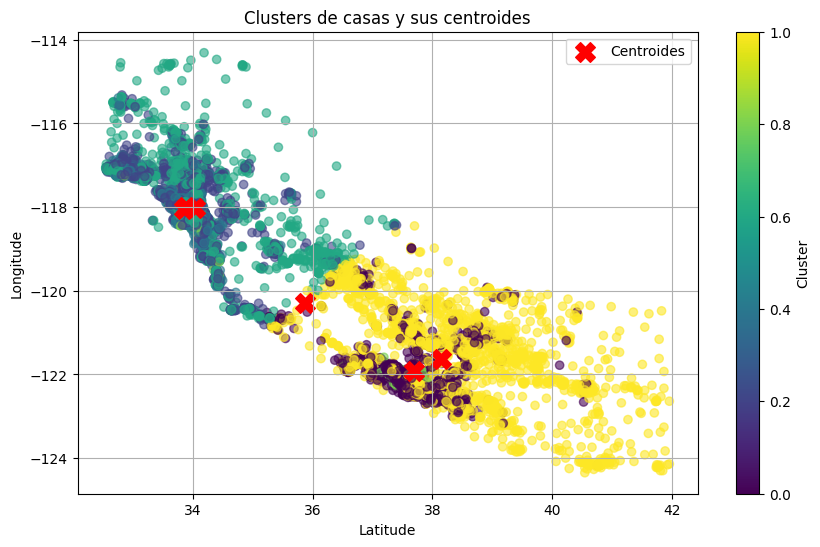

In [103]:
import matplotlib.pyplot as plt

# Scatter de los puntos
plt.figure(figsize=(10,6))
plt.scatter(X_train['Latitude'], X_train['Longitude'], c=X_train['Cluster'], cmap='viridis', alpha=0.6)

# Centroides
centroides = model.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=200, label='Centroides')

# Estética
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters de casas y sus centroides')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()



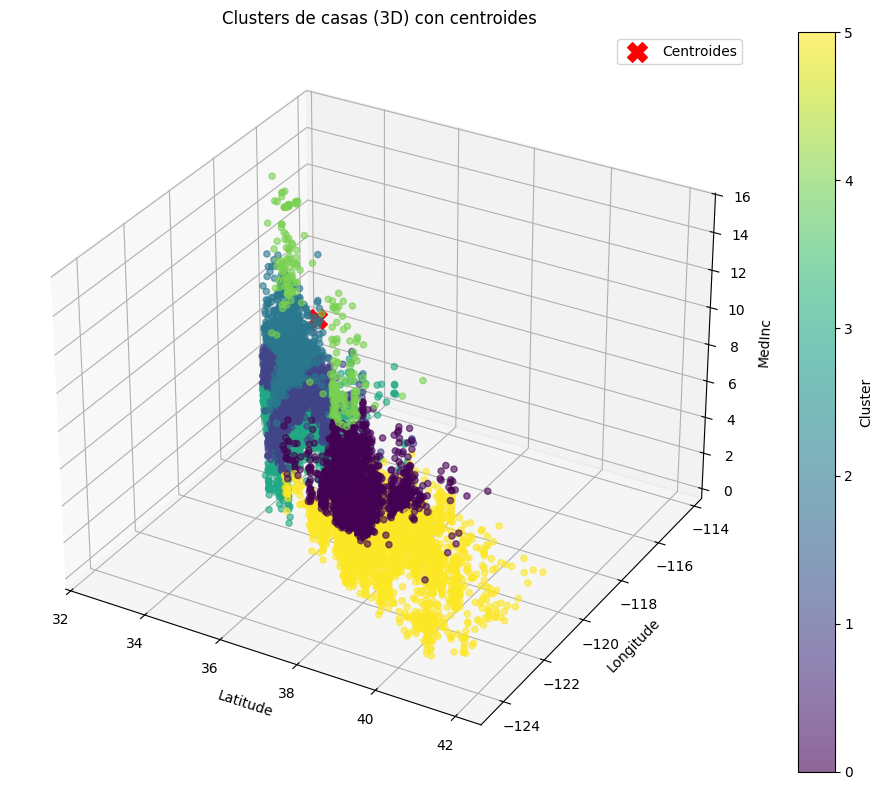

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter de los puntos
sc = ax.scatter(
    X_train['Latitude'], X_train['Longitude'], X_train['MedInc'],
    c=X_train['Cluster'], cmap='viridis', alpha=0.6
)

# Centroides
centroides = model.cluster_centers_
ax.scatter(
    centroides[:, 0], centroides[:, 1], centroides[:, 2],
    c='red', marker='X', s=200, label='Centroides', depthshade=False
)

# Etiquetas
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedInc')
ax.set_title('Clusters de casas (3D) con centroides')
fig.colorbar(sc, label='Cluster')
plt.legend()
plt.tight_layout()
plt.show()


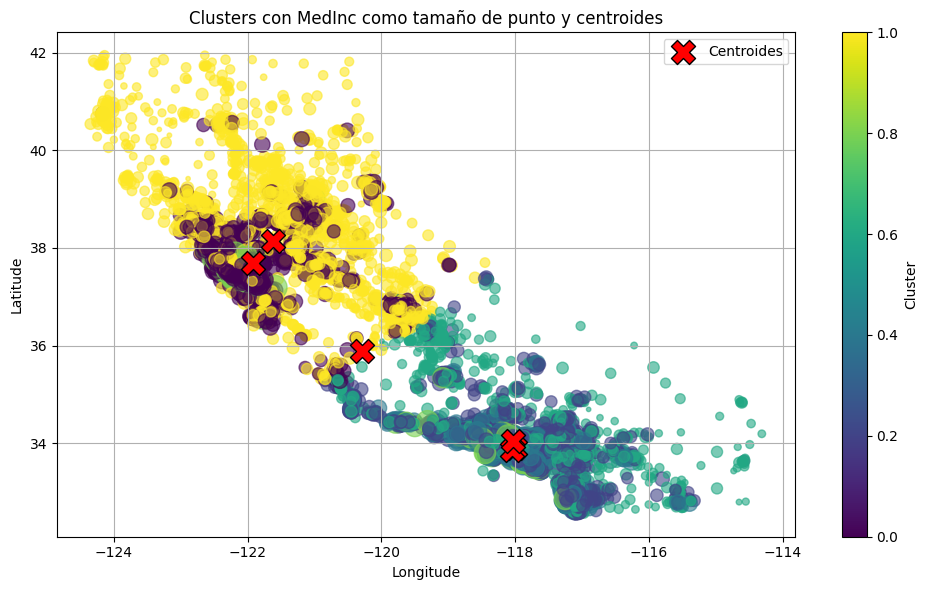

In [105]:
plt.figure(figsize=(10, 6))

# Scatter de los puntos
plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    c=X_train['Cluster'], cmap='viridis',
    s=X_train['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6,
)

# Centroides
centroides = model.cluster_centers_
plt.scatter(
    centroides[:, 1], centroides[:, 0],  # Longitude y Latitude
    c='red', edgecolors='black', marker='X', s=300, label='Centroides',
    zorder=10  # Asegura que estén por encima
)

# Estética
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters con MedInc como tamaño de punto y centroides')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


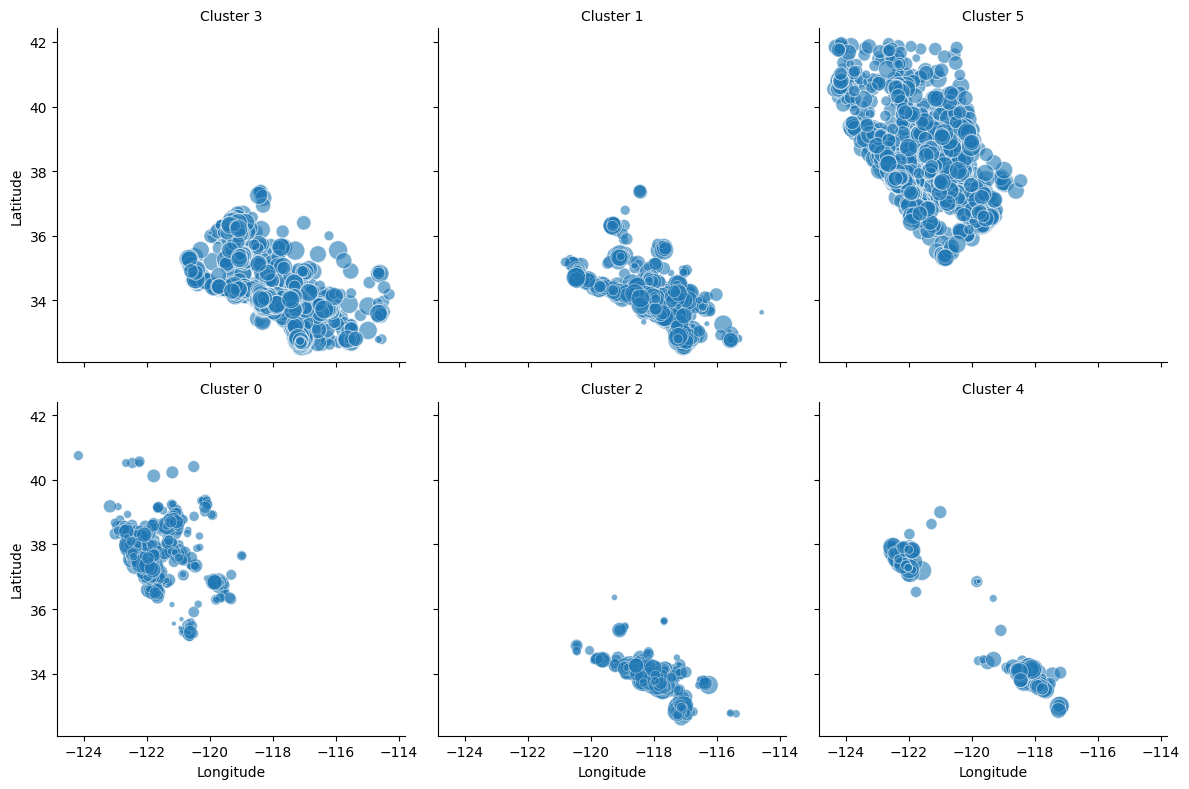

In [106]:
import seaborn as sns

X_train_copy = X_train.copy()
X_train_copy['Cluster'] = X_train_copy['Cluster'].astype(str)  # Para evitar errores

g = sns.FacetGrid(X_train_copy, col="Cluster", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x="Longitude", y="Latitude", size="MedInc", sizes=(10, 200), alpha=0.6)
g.set_axis_labels("Longitude", "Latitude")
g.set_titles("Cluster {col_name}")
plt.tight_layout()
plt.show()

### Paso 3: Predice con el conjunto de test

In [107]:
# Realizar predicciones con datos nuevos
new_data = X_test
predictions = model.predict(new_data)

In [108]:
predictions

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [109]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [110]:
X_test['Cluster'] = predictions
X_test.head()

,Latitude,Longitude,MedInc,Cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


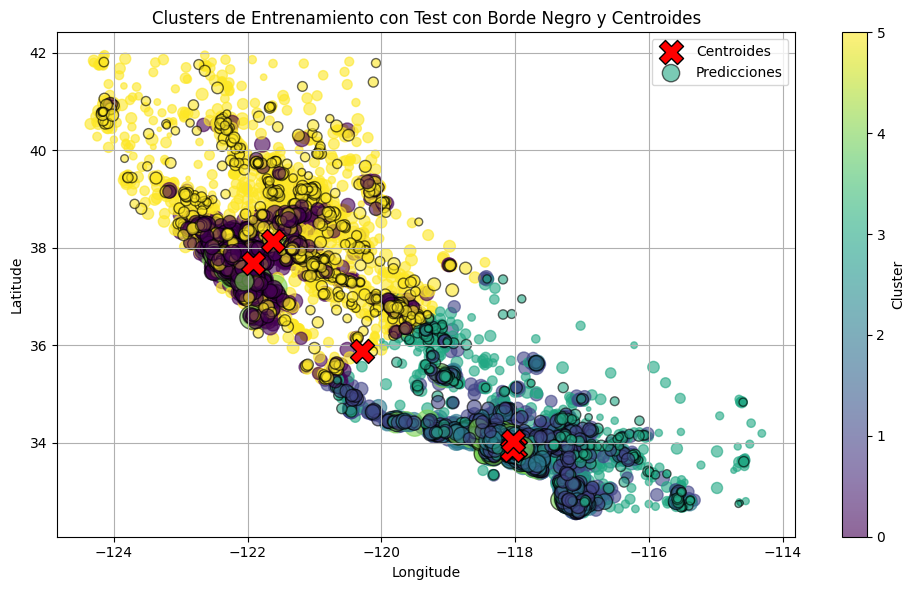

In [111]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(10, 6))

# Scatter de los puntos de entrenamiento con colores por cluster
plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    c=X_train['Cluster'], cmap='viridis',
    s=X_train['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6,
)

# Centroides
centroides = model.cluster_centers_
plt.scatter(
    centroides[:, 1], centroides[:, 0],  # Longitude y Latitude
    c='red', edgecolors='black', marker='X', s=300, label='Centroides',
    zorder=10  # Asegura que estén por encima
)

# Scatter de los puntos de test con borde negro
plt.scatter(
    X_test['Longitude'], X_test['Latitude'],
    c=X_test['Cluster'], cmap='viridis',  # Usamos el mismo cmap para asignar colores por predicción
    s=X_test['MedInc'] * 20,  # Tamaño proporcional a MedInc
    alpha=0.6, edgecolors='black',  # Borde negro para diferenciarlos
    label='Predicciones'
)

# Estética
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de Entrenamiento con Test con Borde Negro y Centroides')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

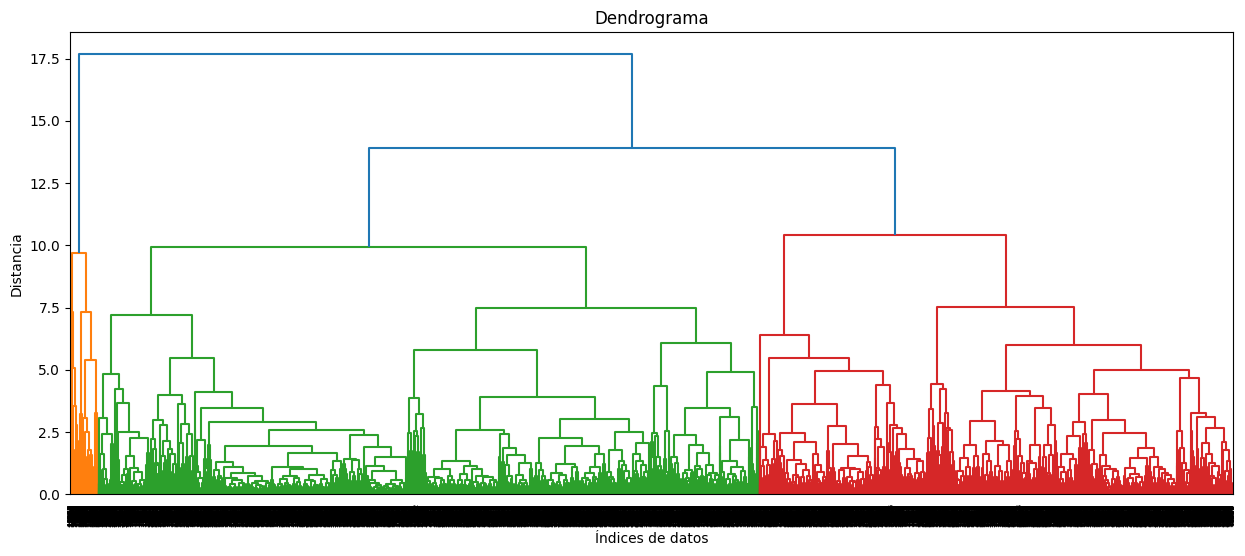

In [121]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs


# Calcular la matriz de similitud entre clusters
Z = linkage(X_train, method = "complete")

# Mostrar el dendrograma
plt.figure(figsize = (15, 6))

dendrogram(Z)

plt.title("Dendrograma")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

### Paso 4: Entrena un modelo de clasificación supervisada

In [112]:
from sklearn.neighbors import KNeighborsClassifier

y_train = X_train['Cluster']

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [119]:
from sklearn.metrics import accuracy_score

y_test = X_test['Cluster']

accuracy_score(y_test, y_pred)

1.0